<a href="https://colab.research.google.com/github/MasoudMoeini/Image-blur-detection/blob/main/image_blur_detection_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib . pyplot as plt
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from numpy import asarray
from keras.models import load_model
from PIL import Image


In [2]:
#!unzip -qq train.zip
#!unzip -qq test.zip
#from datareader import DataReader
#train_images = DataReader('train')
#test_images=DataReader('test')
#!ls train

In [35]:
x_train = np.load('train.npy')
y_train = np.load('label.npy')

In [36]:
 x_train = x_train.astype(np.float32)/ 255.0
 y_train = y_train.astype(np.float32)/ 255.0

In [33]:
input = layers.Input(shape=(224, 224, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(512, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(256, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="sigmoid", padding="same")(x)
output = layers.Conv2DTranspose(3, (3, 3), strides=1, activation="sigmoid", padding="same")(x)

In [37]:
encoder_decoder = Model(input, output)

In [38]:
encoder_decoder.compile(keras.optimizers.Adam(learning_rate=1e-3),
                        loss=tf.keras.losses.MeanSquaredError(),)
encoder_decoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_47 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_48 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_50 (Conv2D)          (None, 112, 112, 64)      36928     
                                                           

In [39]:
## Optimize
history = encoder_decoder.fit(x_train,y_train, epochs=35,batch_size=10, validation_split=0.2, shuffle=True)
encoder_decoder.save('encoderdecoder_model.h5')


Epoch 1/35
80/80 [==============================] - 33s 397ms/step - loss: 0.1905 - val_loss: 0.1918
Epoch 2/35
80/80 [==============================] - 31s 392ms/step - loss: 0.1903 - val_loss: 0.1915
Epoch 3/35
80/80 [==============================] - 31s 394ms/step - loss: 0.1897 - val_loss: 0.1894
Epoch 4/35
80/80 [==============================] - 29s 357ms/step - loss: 0.1832 - val_loss: 0.1851
Epoch 5/35
80/80 [==============================] - 28s 357ms/step - loss: 0.1764 - val_loss: 0.1635
Epoch 6/35
80/80 [==============================] - 28s 356ms/step - loss: 0.1487 - val_loss: 0.1373
Epoch 7/35
80/80 [==============================] - 28s 356ms/step - loss: 0.1304 - val_loss: 0.1223
Epoch 8/35
80/80 [==============================] - 28s 356ms/step - loss: 0.1179 - val_loss: 0.1104
Epoch 9/35
80/80 [==============================] - 28s 356ms/step - loss: 0.1153 - val_loss: 0.1094
Epoch 10/35
80/80 [==============================] - 31s 388ms/step - loss: 0.1105 - val_lo

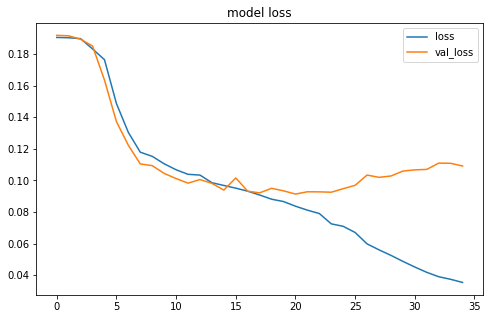

In [40]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title('model loss')
plt.show()

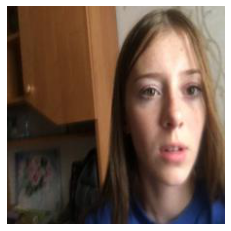

In [41]:
img= Image.open("89_IPHONE-6S_.jpg")
plt.imshow(img)
plt.axis("off")
img = asarray(img).astype(np.float32)/ 255.0
img = np.expand_dims(img, axis=0)

In [42]:
pred = encoder_decoder.predict(img)
pred = (pred[0]*255.0).astype(np.uint8)

In [43]:
pred.shape

(224, 224, 3)

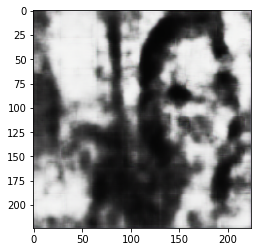

In [44]:
plt.imshow(pred)

(-0.5, 223.5, 223.5, -0.5)

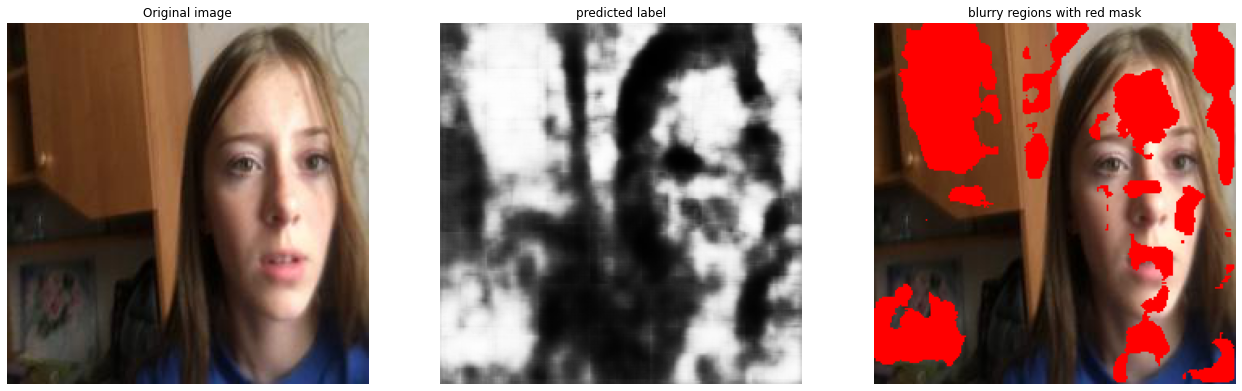

In [45]:
main_picture = Image.open("89_IPHONE-6S_.jpg")
label_picture = Image.fromarray(pred)
final_image = main_picture.copy()
label_to_gray = label_picture.convert('L')
rescale_label=label_to_gray.copy()
rescale_label= np.array(rescale_label).astype(np.float32)/255.0

# Get the size of the image
width, height = label_to_gray.size

# Process every pixel
for x in range(0, width - 1):
    for y in range(0, height - 1):
        current_color = final_image.getpixel((x,y))
        if (label_to_gray.getpixel((x,y)))>210:
            final_image.putpixel((x,y),(255,0,0) )            
plt.figure(figsize=(22,22))
ax = plt.subplot(1,3,1)
main_picture.show()
plt.title('Original image')  
plt.imshow(main_picture, cmap='binary')
plt.axis("off")

ax = plt.subplot(1,3,2)
plt.title('predicted label')  
plt.imshow(rescale_label, cmap='gray')
plt.axis("off")

ax = plt.subplot(1,3,3)
plt.title('blurry regions with red mask') 
plt.imshow(final_image, cmap='binary')
plt.axis("off")